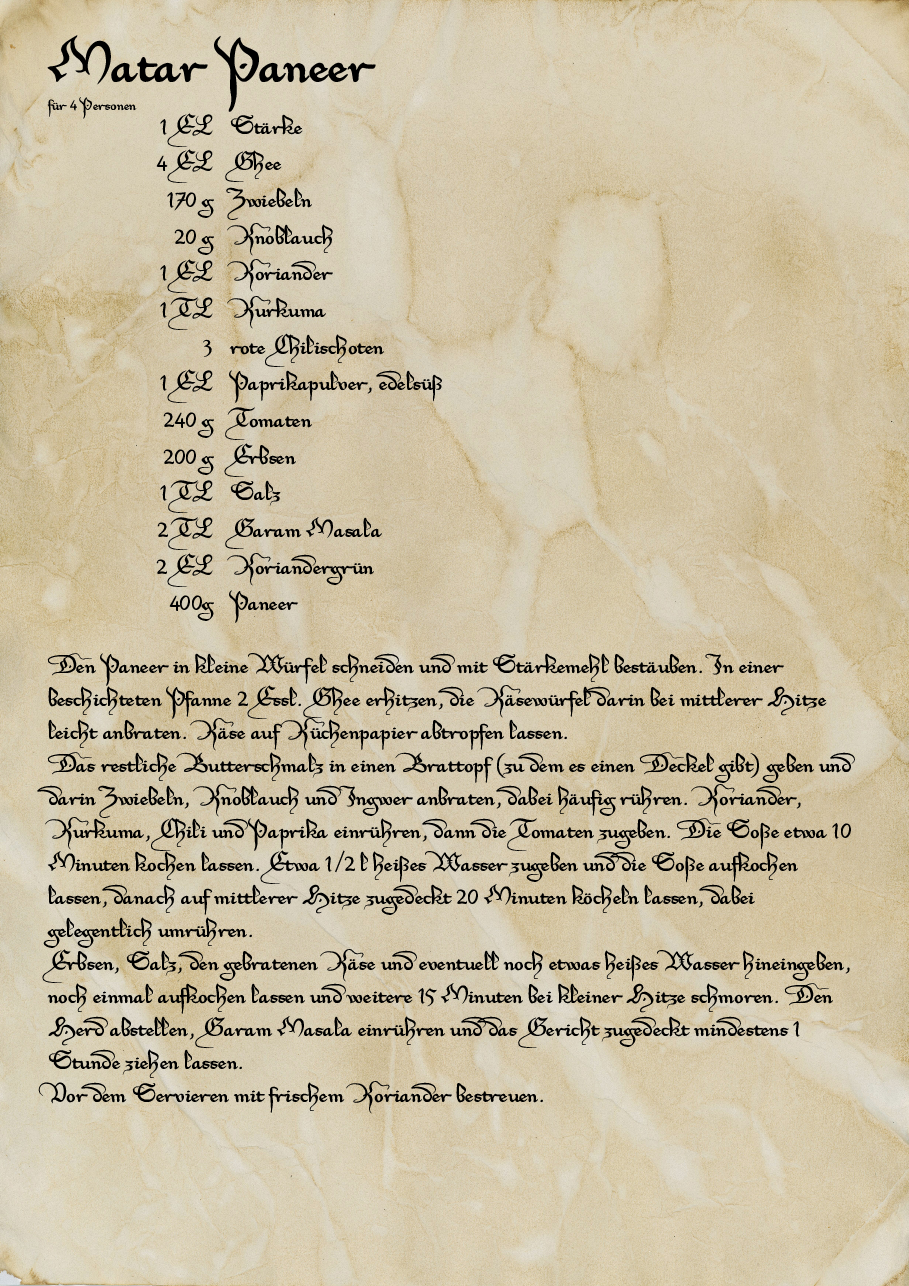

In [40]:
import fpdf
from fpdf import FPDF
from wand.image import Image as WImage

matar_paneer = {
    "title": "Matar Paneer",
    "servings": "für 4 Personen",
    "ingredients": [
        {"1 EL": "Stärke"},
        {"4 EL": "Ghee"},
        {"170 g": "Zwiebeln"},
        {"20 g": "Knoblauch"},
        {"1 EL": "Koriander"},
        {"1 TL": "Kurkuma"},
        {"3": "rote Chilischoten"},
        {"1 EL": "Paprikapulver, edelsüß"},
        {"240 g": "Tomaten"},
        {"200 g": "Erbsen"},
        {"1 TL": "Salz"},
        {"2 TL": "Garam Masala"},
        {"2 EL": "Koriandergrün"},
        {"400g": "Paneer"}
    ],
    "description": [
        "Den Paneer in kleine Würfel schneiden und mit Stärkemehl bestäuben. In einer beschichteten Pfanne " + 
        "2 Essl. Ghee erhitzen, die Käsewürfel darin bei mittlerer Hitze leicht anbraten. Käse auf " + 
        "Küchenpapier abtropfen lassen.",
        "Das restliche Butterschmalz in einen Brattopf (zu dem es einen Deckel gibt) geben und darin " + 
        "Zwiebeln, Knoblauch und Ingwer anbraten, dabei häufig rühren. Koriander, Kurkuma, Chili und " +
        "Paprika einrühren, dann die Tomaten zugeben. Die Soße etwa 10 Minuten kochen lassen. Etwa 1/2 l " +
        "heißes Wasser zugeben und die Soße aufkochen lassen, danach auf mittlerer Hitze zugedeckt " +
        "20 Minuten köcheln lassen, dabei gelegentlich umrühren.",
        "Erbsen, Salz, den gebratenen Käse und eventuell noch etwas heißes Wasser hineingeben, noch einmal " +
        "aufkochen lassen und weitere 15 Minuten bei kleiner Hitze schmoren. Den Herd abstellen, " + 
        "Garam Masala einrühren und das Gericht zugedeckt mindestens 1 Stunde ziehen lassen.",
        "Vor dem Servieren mit frischem Koriander bestreuen."
    ]
}
recipes = [matar_paneer]

pdf = FPDF(orientation='P', unit='mm', format='A4')
fpdf.SYSTEM_TTFONTS = '~/.local/share/fonts/'
pdf.add_font('Xirwena', '', 'xirwen3U.ttf', uni=True)
for recipe in recipes:
    pdf.add_page()
    pdf.image("texture-of-parchment-paper.jpg", x=-4, y=-8, w=217, h=313)
    pdf.set_font('Xirwena', size=28)
    pdf.cell(0, pdf.font_size * 1.2, txt=recipe["title"], ln=1, align="L")
    pdf.set_font('Xirwena', size=8)
    pdf.cell(0, pdf.font_size * 2, txt=recipe["servings"], ln=1, align="L")
    pdf.set_font('Xirwena', size=12)
    for ingredient in recipe["ingredients"]:
        pdf.cell(40, pdf.font_size * 1.0,
                     txt=list(ingredient.keys())[0], ln=0, align="R")
        pdf.cell(2, 0, txt="", ln=0, align="R")
        pdf.cell(0, pdf.font_size * 1.0,
                     txt=ingredient[list(ingredient.keys())[0]], ln=1, align="L")
        pdf.ln()
    pdf.ln()
    for line in recipe["description"]:
        pdf.write(h=pdf.font_size * 1.8, txt=line)
        pdf.ln()
pdf.output("test.pdf")

WImage(filename="test.pdf[0]", resolution=110)